<a href="https://colab.research.google.com/github/Baladithya23/E-commerce/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MNIST DATASET**

Loading MNIST dataset...
11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data shape: (60000, 784)
Testing data shape: (10000, 784)

Applying PCA...
Shape after PCA: (60000, 50)

Applying t-SNE (on a subset due to high computation)...


/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


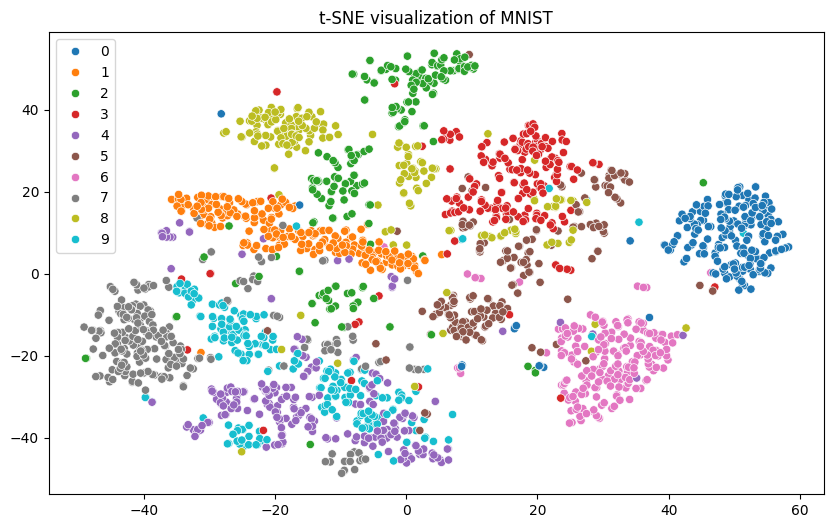


Training Logistic Regression...


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Logistic Regression Accuracy: 0.9117
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96       980
           1       0.96      0.98      0.97      1135
           2       0.92      0.88      0.90      1032
           3       0.88      0.90      0.89      1010
           4       0.91      0.92      0.92       982
           5       0.88      0.84      0.86       892
           6       0.93      0.94      0.93       958
           7       0.93      0.91      0.92      1028
           8       0.86      0.86      0.86       974
           9       0.89      0.89      0.89      1009

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



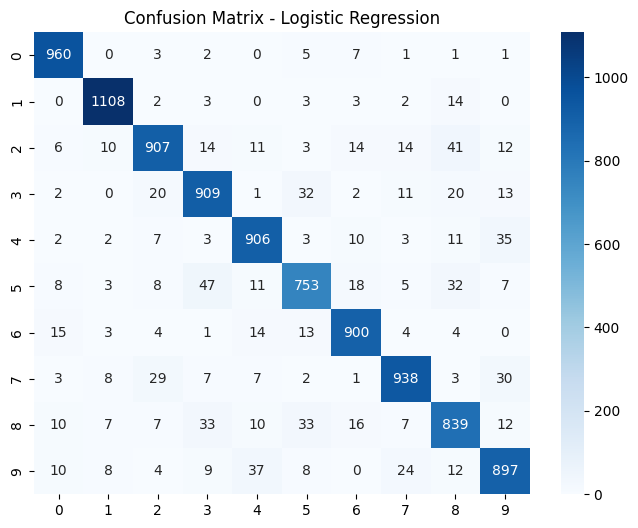


Building Neural Network...


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
422/422 - 3s - 8ms/step - accuracy: 0.8989 - loss: 0.3589 - val_accuracy: 0.9570 - val_loss: 0.1566
Epoch 2/5
422/422 - 3s - 7ms/step - accuracy: 0.9555 - loss: 0.1505 - val_accuracy: 0.9663 - val_loss: 0.1103
Epoch 3/5
422/422 - 2s - 4ms/step - accuracy: 0.9688 - loss: 0.1046 - val_accuracy: 0.9730 - val_loss: 0.0881
Epoch 4/5
422/422 - 2s - 4ms/step - accuracy: 0.9763 - loss: 0.0788 - val_accuracy: 0.9755 - val_loss: 0.0850
Epoch 5/5
422/422 - 2s - 5ms/step - accuracy: 0.9818 - loss: 0.0613 - val_accuracy: 0.9803 - val_loss: 0.0743

Neural Network Accuracy: 0.975600004196167


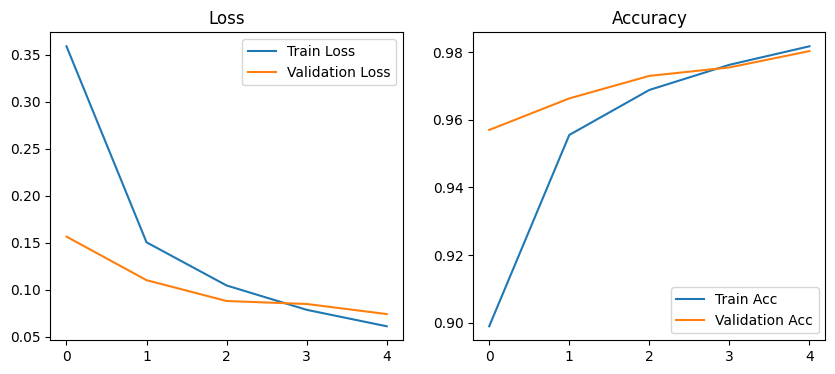

In [ ]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

# -----------------------------
# 1. Load & Preprocess Data
# -----------------------------
print("Loading MNIST dataset...")
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values (0-255 → 0-1)
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Flatten images (28x28 → 784)
x_train_flat = x_train.reshape(len(x_train), -1)
x_test_flat = x_test.reshape(len(x_test), -1)

print("Training data shape:", x_train_flat.shape)
print("Testing data shape:", x_test_flat.shape)

# -----------------------------
# 2. Dimensionality Reduction
# -----------------------------
print("\nApplying PCA...")
pca = PCA(n_components=50)  # Reduce to 50 dimensions
x_train_pca = pca.fit_transform(x_train_flat)
x_test_pca = pca.transform(x_test_flat)
print("Shape after PCA:", x_train_pca.shape)

print("\nApplying t-SNE (on a subset due to high computation)...")
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
x_subset = x_train_flat[:2000]
y_subset = y_train[:2000]
x_tsne = tsne.fit_transform(x_subset)

# Plot t-SNE visualization
plt.figure(figsize=(10,6))
sns.scatterplot(x=x_tsne[:,0], y=x_tsne[:,1], hue=y_subset, palette="tab10", legend="full")
plt.title("t-SNE visualization of MNIST")
plt.show()

# -----------------------------
# 3. Logistic Regression Classifier
# -----------------------------
print("\nTraining Logistic Regression...")
log_reg = LogisticRegression(max_iter=1000, solver='lbfgs', multi_class='multinomial')
log_reg.fit(x_train_pca, y_train)

# Predictions
y_pred_log = log_reg.predict(x_test_pca)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print("Classification Report:\n", classification_report(y_test, y_pred_log))

# Confusion Matrix
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred_log), annot=True, fmt='d', cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

# -----------------------------
# 4. Neural Network Classifier
# -----------------------------
print("\nBuilding Neural Network...")
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

model = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

history = model.fit(x_train, y_train_cat, epochs=5, batch_size=128, validation_split=0.1, verbose=2)

# Evaluate model
test_loss, test_acc = model.evaluate(x_test, y_test_cat, verbose=0)
print("\nNeural Network Accuracy:", test_acc)

# Plot training history
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label="Train Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.legend()
plt.title("Loss")

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label="Train Acc")
plt.plot(history.history['val_accuracy'], label="Validation Acc")
plt.legend()
plt.title("Accuracy")
plt.show()


In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import numpy as np

# Load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(-1,28,28,1).astype("float32")/255.0
x_test  = x_test.reshape(-1,28,28,1).astype("float32")/255.0
y_train_cat = to_categorical(y_train, 10)
y_test_cat  = to_categorical(y_test, 10)

# Build CNN model
cnn = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
cnn.fit(x_train, y_train_cat, epochs=5, batch_size=128, verbose=2, validation_split=0.1)

# Evaluate
y_pred = cnn.predict(x_test).argmax(axis=1)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
422/422 - 41s - 97ms/step - accuracy: 0.9060 - loss: 0.3106 - val_accuracy: 0.9787 - val_loss: 0.0725
Epoch 2/5
422/422 - 40s - 95ms/step - accuracy: 0.9696 - loss: 0.1021 - val_accuracy: 0.9858 - val_loss: 0.0485
Epoch 3/5
422/422 - 39s - 92ms/step - accuracy: 0.9777 - loss: 0.0756 - val_accuracy: 0.9875 - val_loss: 0.0430
Epoch 4/5
422/422 - 41s - 97ms/step - accuracy: 0.9818 - loss: 0.0607 - val_accuracy: 0.9902 - val_loss: 0.0372
Epoch 5/5
422/422 - 39s - 92ms/step - accuracy: 0.9844 - loss: 0.0517 - val_accuracy: 0.9893 - val_loss: 0.0334
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.99      1.00      0.99      1032
           3       0.99      0.99      0.99      1010
           4       1.00      0.99      1.00       982
           5       0.99      0.99      0.99       8

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from tensorflow.keras.datasets import mnist

# Load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Flatten 28x28 images into 784 features
x_train_flat = x_train.reshape(len(x_train), -1)
x_test_flat  = x_test.reshape(len(x_test), -1)

# Initialize KNN model (k=3)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train_flat[:10000], y_train[:10000])  # train on subset (for speed)

# Predict
y_pred_knn = knn.predict(x_test_flat[:2000])   # test on subset
print("Classification Report:")
print(classification_report(y_test[:2000], y_pred_knn))
print("Accuracy Score:", accuracy_score(y_test[:2000], y_pred_knn))


Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       175
           1       0.90      1.00      0.95       234
           2       0.98      0.89      0.93       219
           3       0.91      0.91      0.91       207
           4       0.94      0.94      0.94       217
           5       0.91      0.91      0.91       179
           6       0.95      0.97      0.96       178
           7       0.89      0.91      0.90       205
           8       0.95      0.80      0.87       192
           9       0.89      0.90      0.89       194

    accuracy                           0.92      2000
   macro avg       0.92      0.92      0.92      2000
weighted avg       0.92      0.92      0.92      2000

Accuracy Score: 0.9235


In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score
from tensorflow.keras.datasets import mnist

# Load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Flatten images
x_train_flat = x_train.reshape(len(x_train), -1)
x_test_flat  = x_test.reshape(len(x_test), -1)

# Initialize Naive Bayes
nb = GaussianNB()
nb.fit(x_train_flat[:10000], y_train[:10000])   # train on subset for speed

# Predict
y_pred_nb = nb.predict(x_test_flat[:2000])
print("Classification Report:")
print(classification_report(y_test[:2000], y_pred_nb))
print("Accuracy Score:", accuracy_score(y_test[:2000], y_pred_nb))


Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.91      0.80       175
           1       0.59      0.98      0.74       234
           2       0.87      0.30      0.44       219
           3       0.77      0.29      0.43       207
           4       0.73      0.18      0.28       217
           5       0.71      0.09      0.17       179
           6       0.64      0.82      0.72       178
           7       0.85      0.33      0.47       205
           8       0.27      0.50      0.35       192
           9       0.36      0.92      0.52       194

    accuracy                           0.53      2000
   macro avg       0.65      0.53      0.49      2000
weighted avg       0.65      0.53      0.49      2000

Accuracy Score: 0.5285


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from tensorflow.keras.datasets import mnist

# Load MNIST data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Flatten images
x_train_flat = x_train.reshape(len(x_train), -1)
x_test_flat  = x_test.reshape(len(x_test), -1)

# Initialize Decision Tree
dt = DecisionTreeClassifier(max_depth=15, random_state=42)  # max_depth to prevent overfitting

# Train on a subset for speed
dt.fit(x_train_flat[:10000], y_train[:10000])

# Predict on a subset of test data
y_pred_dt = dt.predict(x_test_flat[:2000])

# Evaluate
print("Decision Tree Classification Report:")
print(classification_report(y_test[:2000], y_pred_dt))
print("Accuracy Score:", accuracy_score(y_test[:2000], y_pred_dt))


Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.86      0.83       175
           1       0.89      0.94      0.91       234
           2       0.77      0.74      0.76       219
           3       0.73      0.70      0.71       207
           4       0.77      0.74      0.76       217
           5       0.68      0.71      0.69       179
           6       0.77      0.75      0.76       178
           7       0.86      0.86      0.86       205
           8       0.65      0.58      0.61       192
           9       0.72      0.80      0.76       194

    accuracy                           0.77      2000
   macro avg       0.77      0.77      0.77      2000
weighted avg       0.77      0.77      0.77      2000

Accuracy Score: 0.77
